# **InterSavy_Data_Science_Internship_Task 1**

## Use classification technique for prediction of Graduate Admissions from an Indian perspective

#### **Dataset**-[https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv]

# **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
admission_df = pd.read_csv("/content/Admission_Predict (1).csv")

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df.shape

(400, 9)

In [5]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# **Data Pre-processing**

In [7]:
admission_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
admission_df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
admission_df.drop("Serial No.", axis=1, inplace=True)

In [10]:
admission_df.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
172,322,110,4,4.0,5.0,9.13,1,0.86
21,325,114,4,3.0,2.0,8.40,0,0.70
367,311,98,1,1.0,2.5,7.46,0,0.57
98,332,119,4,5.0,4.5,9.24,1,0.90
354,297,98,2,2.5,3.0,7.67,0,0.59


# **EDA(Exploratory Data Analysis)**

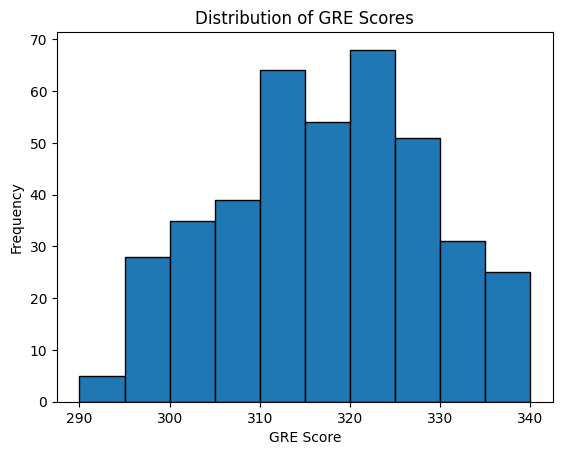

In [11]:
plt.hist(admission_df["GRE Score"], bins=10, edgecolor="black")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.title("Distribution of GRE Scores")
plt.show()

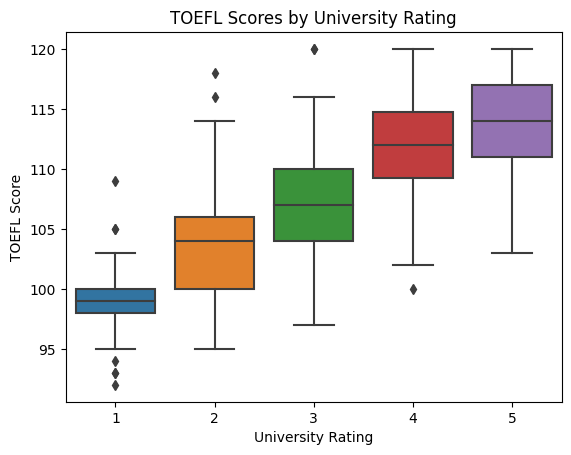

In [12]:
sns.boxplot(x="University Rating", y="TOEFL Score", data=admission_df)
plt.xlabel("University Rating")
plt.ylabel("TOEFL Score")
plt.title("TOEFL Scores by University Rating")
plt.show()

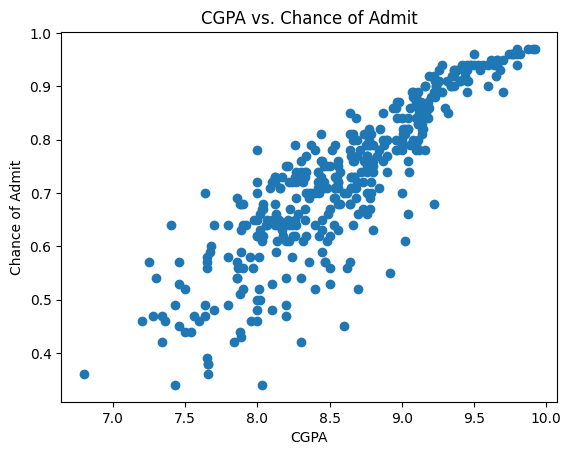

In [13]:
plt.scatter(admission_df["CGPA"], admission_df["Chance of Admit "])
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("CGPA vs. Chance of Admit")
plt.show()

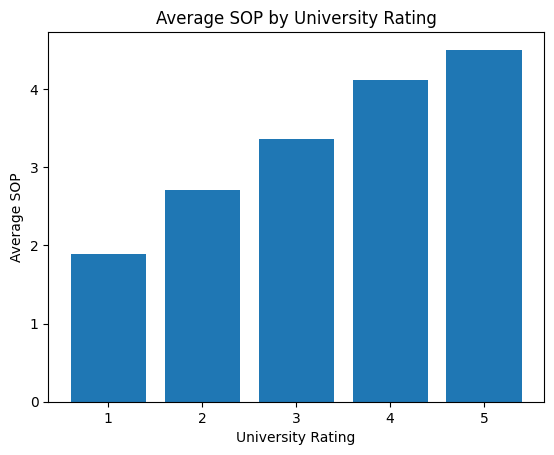

In [14]:
avg_sop_by_rating = admission_df.groupby("University Rating")["SOP"].mean()
plt.bar(avg_sop_by_rating.index, avg_sop_by_rating)
plt.xlabel("University Rating")
plt.ylabel("Average SOP")
plt.title("Average SOP by University Rating")
plt.show()

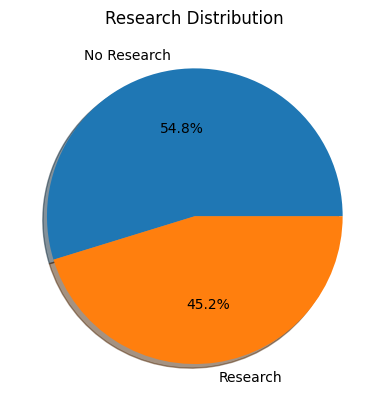

In [15]:
research_counts = admission_df["Research"].value_counts()
plt.pie(research_counts, labels=["No Research", "Research"], autopct="%1.1f%%", shadow=True)
plt.title("Research Distribution")
plt.show()

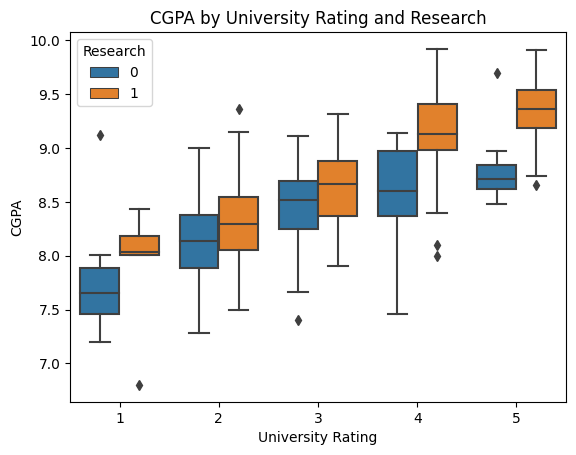

In [16]:
sns.boxplot(x="University Rating", y="CGPA", hue="Research", data=admission_df)
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.title("CGPA by University Rating and Research")
plt.legend(title="Research")
plt.show()

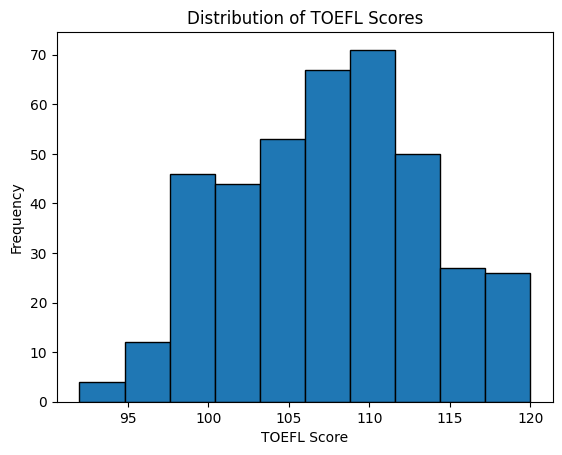

In [17]:
plt.hist(admission_df["TOEFL Score"], bins=10, edgecolor="black")
plt.xlabel("TOEFL Score")
plt.ylabel("Frequency")
plt.title("Distribution of TOEFL Scores")
plt.show()

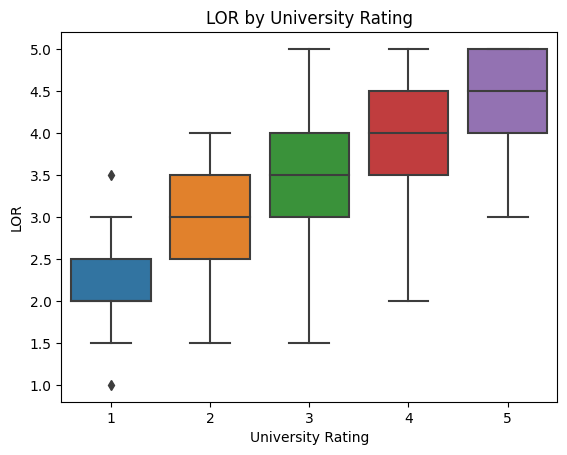

In [20]:
sns.boxplot(x="University Rating", y="LOR ", data=admission_df)
plt.xlabel("University Rating")
plt.ylabel("LOR")
plt.title("LOR by University Rating")
plt.show()

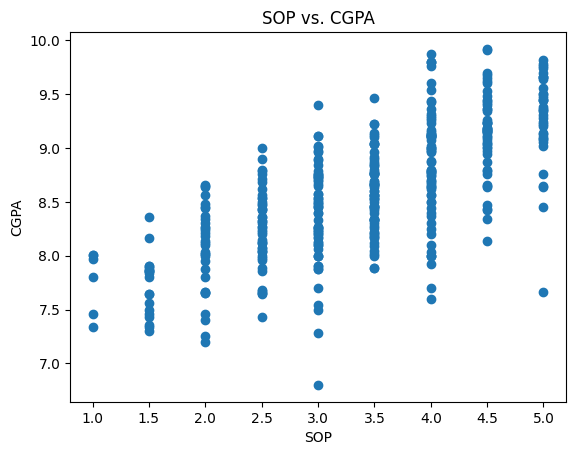

In [21]:
plt.scatter(admission_df["SOP"], admission_df["CGPA"])
plt.xlabel("SOP")
plt.ylabel("CGPA")
plt.title("SOP vs. CGPA")
plt.show()

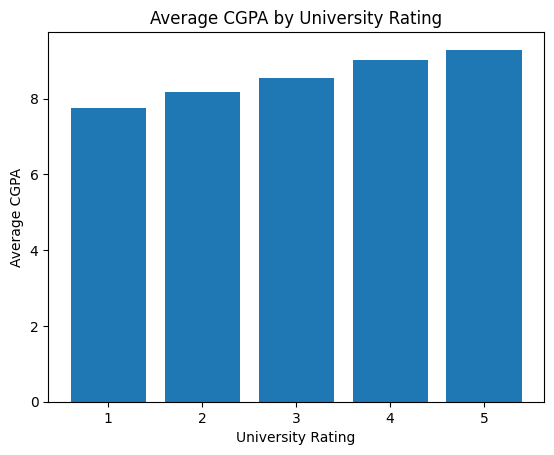

In [22]:
avg_cgpa_by_rating = admission_df.groupby("University Rating")["CGPA"].mean()
plt.bar(avg_cgpa_by_rating.index, avg_cgpa_by_rating)
plt.xlabel("University Rating")
plt.ylabel("Average CGPA")
plt.title("Average CGPA by University Rating")
plt.show()

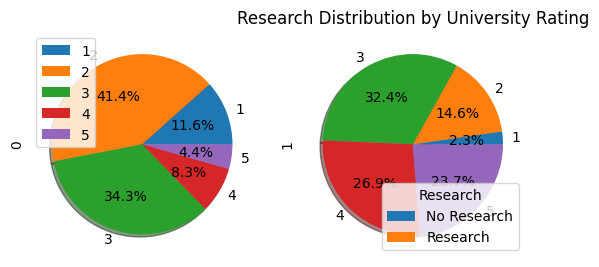

In [23]:
research_by_rating = admission_df.groupby("University Rating")["Research"].value_counts().unstack()
research_by_rating.plot(kind="pie", subplots=True, autopct="%1.1f%%", shadow=True)
plt.legend(["No Research", "Research"], title="Research")
plt.title("Research Distribution by University Rating")
plt.show()

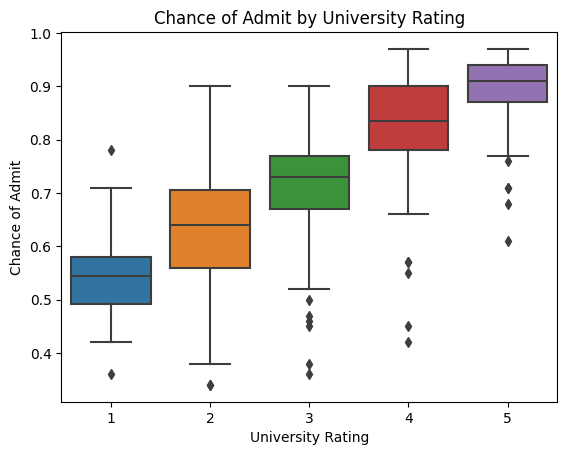

In [24]:
sns.boxplot(x="University Rating", y="Chance of Admit ", data=admission_df)
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.title("Chance of Admit by University Rating")
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
admission_df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]] = scaler.fit_transform(
    admission_df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]]
)

# **Model Building**

## **Logistic Regression**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = admission_df.drop("Chance of Admit ", axis=1)
y = admission_df["Chance of Admit "]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
threshold = 0.5

In [32]:
y_train_binary = np.where(y_train > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train_binary)

LogisticRegression()

In [34]:
lr_y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [36]:
lr_accuracy = accuracy_score(y_test_binary, lr_y_pred)
print("Accuracy:", lr_accuracy)

lr_classification_rep = classification_report(y_test_binary, lr_y_pred)
print("Classification Report:\n", lr_classification_rep)

Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      1.00      0.93        70

    accuracy                           0.88        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.77      0.88      0.82        80



## **Decision Tree Classifier**

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train_binary)

DecisionTreeClassifier()

In [39]:
dt_y_pred = model.predict(X_test)

In [40]:
dt_accuracy = accuracy_score(y_test_binary, dt_y_pred)
print("Accuracy:", dt_accuracy)

dt_classification_rep = classification_report(y_test_binary, dt_y_pred)
print("Classification Report:\n", dt_classification_rep)

Accuracy: 0.8625
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.93      0.91      0.92        70

    accuracy                           0.86        80
   macro avg       0.69      0.71      0.70        80
weighted avg       0.87      0.86      0.87        80



## **Random Forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier()
model.fit(X_train, y_train_binary)

RandomForestClassifier()

In [43]:
rf_y_pred = model.predict(X_test)

In [44]:
rf_accuracy = accuracy_score(y_test_binary, rf_y_pred)
print("Accuracy:", rf_accuracy)

rf_classification_rep = classification_report(y_test_binary, rf_y_pred)
print("Classification Report:\n", rf_classification_rep)

Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.91      1.00      0.95        70

    accuracy                           0.91        80
   macro avg       0.95      0.65      0.71        80
weighted avg       0.92      0.91      0.89        80



## **Support Vector Machines (SVM) Classifier**

In [45]:
from sklearn.svm import SVC

In [46]:
model = SVC()
model.fit(X_train, y_train_binary)

SVC()

In [47]:
svc_y_pred = model.predict(X_test)

In [48]:
svc_accuracy = accuracy_score(y_test_binary, svc_y_pred)
print("Accuracy:", svc_accuracy)

svc_classification_rep = classification_report(y_test_binary, svc_y_pred)
print("Classification Report:\n", svc_classification_rep)

Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      1.00      0.93        70

    accuracy                           0.88        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.77      0.88      0.82        80



## **Gradient Boosting Classifier**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train_binary)

GradientBoostingClassifier()

In [51]:
gb_y_pred = model.predict(X_test)

In [52]:
gb_accuracy = accuracy_score(y_test_binary, gb_y_pred)
print("Accuracy:", gb_accuracy)

gb_classification_rep = classification_report(y_test_binary, gb_y_pred)
print("Classification Report:\n", gb_classification_rep)

Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.92      0.99      0.95        70

    accuracy                           0.91        80
   macro avg       0.86      0.69      0.74        80
weighted avg       0.91      0.91      0.90        80



# **Model Comparision**

In [53]:
models_df = pd.DataFrame({
    'Model': "LogisticRegression DecisionTree RandomForeste SVC GB".split(),
    'Accuracy': [lr_accuracy, dt_accuracy,rf_accuracy,svc_accuracy,gb_accuracy]
})

models_df

,Model,Accuracy
0,LogisticRegression,0.8750
1,DecisionTree,0.8625
2,RandomForeste,0.9125
3,SVC,0.8750
4,GB,0.9125


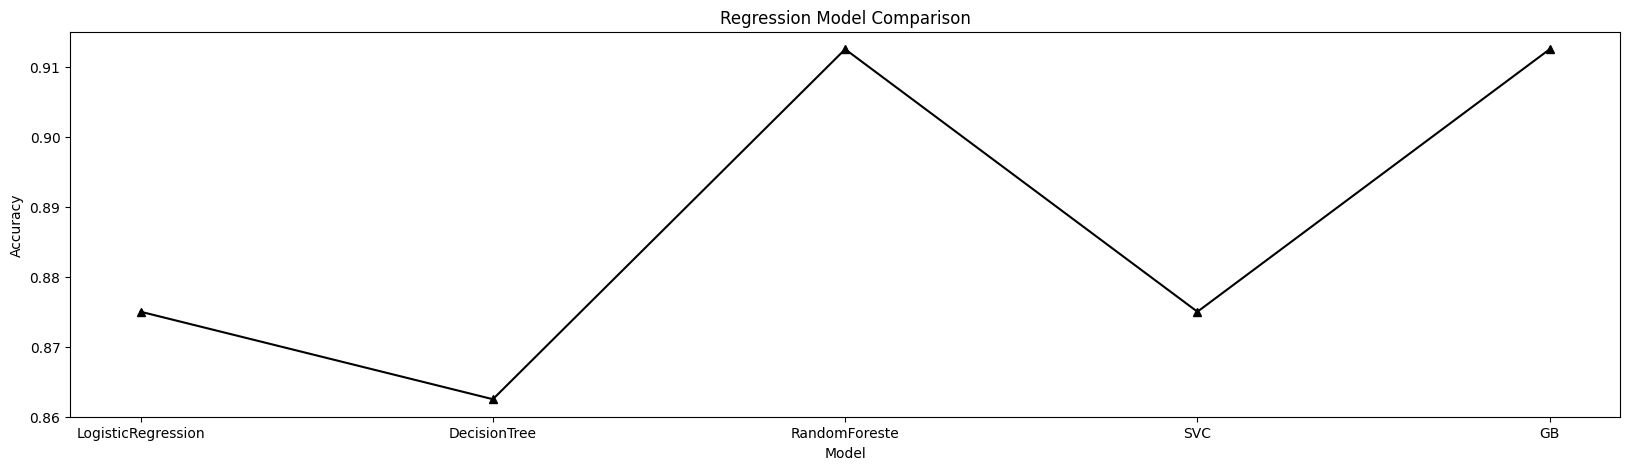

In [54]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(models_df.Model, models_df.Accuracy, color='black', marker='^')
ax.set_title("Regression Model Comparison")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
plt.show()